In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import matplotlib as mpl
from cycler import cycler
from scipy.integrate import simpson
from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n


mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100


ModuleNotFoundError: No module named 'mendeleev'


# Carbon

In [2]:
C1_GP = read_csv("GP_data/GP_C1_profile.dat", delim_whitespace=True, header=0)
C1_GP

,x,r,Vcoul,Vexc,V,rV,dNedr_b,dNedr_s,dNedr_f,dNedr,ne_b,ne_s,ne_f,ne
0,0.000113,0.000167,36000.000000,3.782000,3.600000e+04,6.001000e+00,0.000041,0.000000,0.000015,0.000041,117.000000,0.0000,42.0600,117.0000
1,0.000114,0.000168,35660.000000,3.852000,3.566000e+04,5.998000e+00,0.000042,0.000002,0.000015,0.000044,117.000000,5.8540,41.8600,122.9000
2,0.000115,0.000170,35340.000000,3.852000,3.534000e+04,5.998000e+00,0.000042,0.000002,0.000015,0.000044,117.000000,5.8540,41.6700,122.9000
3,0.000116,0.000171,35020.000000,3.852000,3.502000e+04,5.998000e+00,0.000043,0.000002,0.000015,0.000045,117.000000,5.8540,41.4800,122.9000
4,0.000117,0.000173,34700.000000,3.852000,3.470000e+04,5.998000e+00,0.000044,0.000002,0.000016,0.000046,117.000000,5.8540,41.2900,122.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.964290,1.426400,0.004076,0.006778,1.086000e-02,1.549000e-02,0.001228,5.909000,4.734000,5.910000,0.000048,0.2311,0.1852,0.2312
997,0.973100,1.439400,0.002293,0.005060,7.356000e-03,1.059000e-02,0.001113,5.960000,4.806000,5.961000,0.000043,0.2289,0.1846,0.2290
998,0.981980,1.452500,0.001019,0.003357,4.378000e-03,6.360000e-03,0.001009,6.012000,4.880000,6.013000,0.000038,0.2268,0.1841,0.2268
999,0.990950,1.465800,0.000255,0.001670,1.926000e-03,2.823000e-03,0.000915,6.065000,4.958000,6.066000,0.000034,0.2246,0.1836,0.2247


In [3]:
C1_CHNC = read_csv("results/CHNC_C_rs1.476_TeV2.000.dat", delim_whitespace=True, header=3)
C1_ri = 1.476
C1_Zbar = 4
C1_ne0 = C1_Zbar/(4/3*np.pi*C1_ri**3)

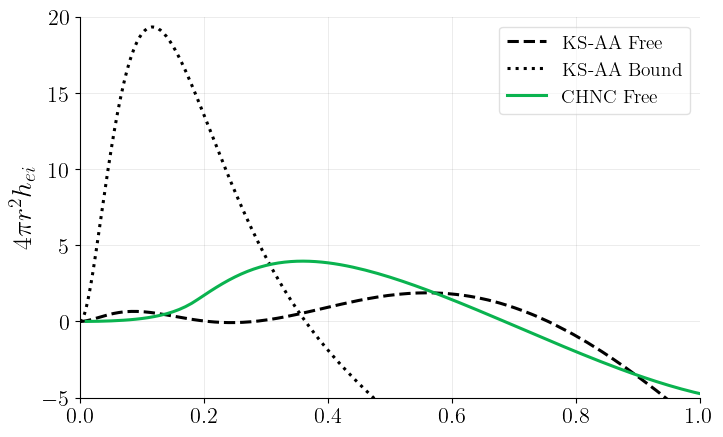

In [4]:
fig, ax  = plt.subplots()

# ax.plot(C1_GP['x'], C1_GP['dNedr_s'] )
# ax.plot(C1_CHNC['r/ri'],4*np.pi*(C1_CHNC['r/ri']*C1_ri)**2*C1_CHNC['g_ei']*C1_ne0)

ax.plot(C1_GP['x'], (C1_GP['ne_s']/C1_ne0-1)*4*π*(C1_GP['r'])**2,'k--', label="KS-AA Free"  )
ax.plot(C1_GP['x'], (C1_GP['ne_b']/C1_ne0-1)*4*π*(C1_GP['r'])**2,'k:', label="KS-AA Bound" )
ax.plot(C1_CHNC['r/ri'],(C1_CHNC['g_ei']-1)*4*π*(C1_CHNC['r/ri']*C1_ri)**2, label="CHNC Free"  )


ax.set_xlim(0,1)
ax.set_ylim(-5,20)
ax.set_ylabel(r"$4\pi r^2 h_{ei}$")
ax.legend()

# Hydrogen

In [5]:
H1_GP = read_csv("GP_data/GP_H1_profile.dat", delim_whitespace=True, header=0)
H1_GP

,x,r,Vcoul,Vexc,V,rV,dNedr_b,dNedr_s,dNedr_f,dNedr,ne_b,ne_s,ne_f,ne
0,0.000717,0.001000,1.000000e+03,-0.284900,9.997000e+02,9.997000e-01,0.0,0.000000,0.000036,0.000000,0.0,0.00000,2.85300,0.00000
1,0.000722,0.001007,9.915000e+02,0.265600,9.917000e+02,9.990000e-01,0.0,0.000005,0.000036,0.000005,0.0,0.42100,2.84200,0.42100
2,0.000727,0.001015,9.843000e+02,0.265600,9.846000e+02,9.989000e-01,0.0,0.000005,0.000037,0.000005,0.0,0.42100,2.83200,0.42100
3,0.000732,0.001022,9.772000e+02,0.265600,9.775000e+02,9.989000e-01,0.0,0.000006,0.000037,0.000006,0.0,0.42100,2.82100,0.42100
4,0.000738,0.001029,9.701000e+02,0.265600,9.704000e+02,9.989000e-01,0.0,0.000006,0.000037,0.000006,0.0,0.42100,2.81100,0.42100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.971450,1.355400,6.028000e-04,0.002494,3.095000e-03,4.195000e-03,0.0,1.383000,1.120000,1.383000,0.0,0.05992,0.04851,0.05992
997,0.978510,1.365300,3.391000e-04,0.001858,2.196000e-03,2.998000e-03,0.0,1.394000,1.134000,1.394000,0.0,0.05952,0.04841,0.05952
998,0.985620,1.375200,1.508000e-04,0.001231,1.381000e-03,1.899000e-03,0.0,1.405000,1.148000,1.405000,0.0,0.05913,0.04832,0.05913
999,0.992790,1.385200,3.771000e-05,0.000611,6.486000e-04,8.984000e-04,0.0,1.417000,1.163000,1.417000,0.0,0.05875,0.04823,0.05875


In [6]:
H1_CHNC = read_csv("results/CHNC_H_rs1.391_TeV2.000.dat", delim_whitespace=True, header=3)
H1_ri = 1.391
H1_Zbar = 1
H1_ne0 = H1_Zbar/(4/3*np.pi*H1_ri**3)
H1_CHNC

,r/ri,g_ii,g_ei,g_ee,OCP:g_ii,Yuk:g_ii,βu_ii_eff,βu_OCP,βu_Yuk
0,0.01,0.0,4.11571,0.134987,0.0,0.0,9.667310e+02,978.062000,9.590460e+02
1,0.02,0.0,4.00360,0.137239,0.0,0.0,4.778560e+02,489.185000,4.703480e+02
2,0.03,0.0,3.89509,0.139769,0.0,0.0,3.149000e+02,326.226000,3.075660e+02
3,0.04,0.0,3.79009,0.142586,0.0,0.0,2.334250e+02,244.746000,2.262610e+02
4,0.05,0.0,3.68850,0.145696,0.0,0.0,1.845420e+02,195.858000,1.775450e+02
...,...,...,...,...,...,...,...,...,...
995,9.96,1.0,1.00000,1.000000,1.0,1.0,-7.191460e-11,0.981681,4.319520e-09
996,9.97,1.0,1.00000,1.000000,1.0,1.0,-7.163140e-11,0.980696,4.232620e-09
997,9.98,1.0,1.00000,1.000000,1.0,1.0,-7.140940e-11,0.979713,4.147480e-09
998,9.99,1.0,1.00000,1.000000,1.0,1.0,-7.124770e-11,0.978733,4.064050e-09


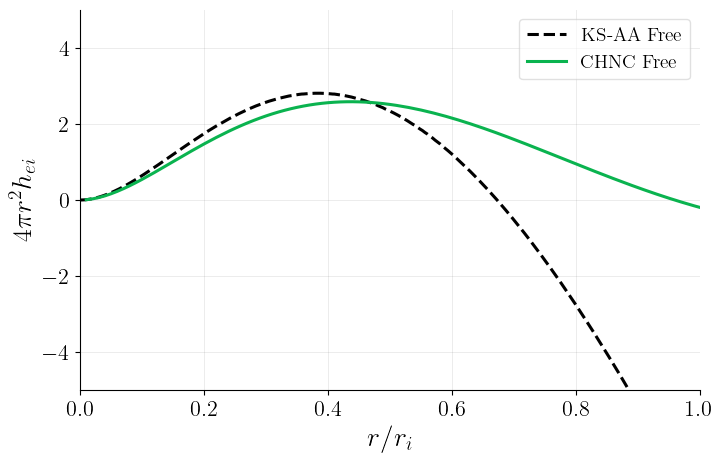

In [14]:
def g_ei_plot(ax):
    ax.plot(H1_GP['x'], (H1_GP['ne_s']/H1_ne0-1)*4*π*(H1_GP['r'])**2,'k--', label="KS-AA Free"  )
    ax.plot(H1_CHNC['r/ri'],(H1_CHNC['g_ei']-1)*4*π*(H1_CHNC['r/ri']*H1_ri)**2, label="CHNC Free"  )

    ax.set_xlim(0,1)
    ax.set_ylim(-5,5)
    ax.set_ylabel(r"$4\pi r^2 h_{ei}$")
    ax.set_xlabel(r"$r/r_i$")
    ax.legend()

fig, ax  = plt.subplots()
g_ei_plot(ax)

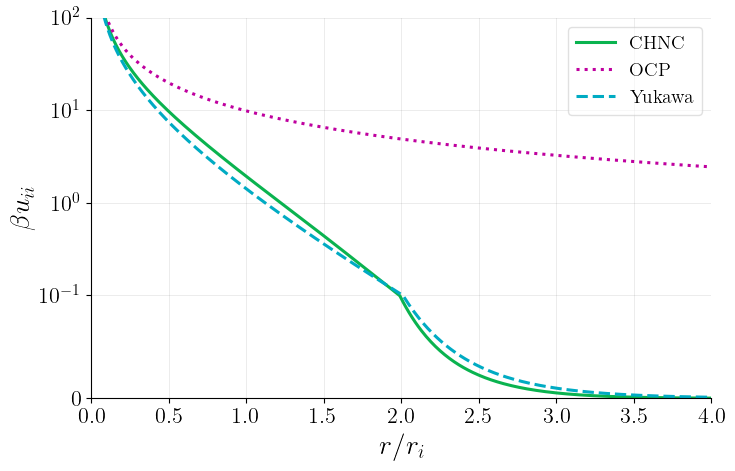

In [8]:
def βu_ii_plot(ax):

    ax.plot(H1_CHNC['r/ri'],H1_CHNC['βu_ii_eff'], label="CHNC"  )
    ax.plot(H1_CHNC['r/ri'],H1_CHNC['βu_OCP'],':', label="OCP"  )
    ax.plot(H1_CHNC['r/ri'],H1_CHNC['βu_Yuk'],'--', label="Yukawa"  )


    ax.set_xlim(0,4)
    ax.set_ylim(0,1e2)
    ax.set_yscale('symlog', linthresh=0.1)
    ax.set_ylabel(r"$\beta u_{ii}$")
    ax.set_xlabel(r"$r/r_i$")
    ax.legend()
    
fig, ax  = plt.subplots()
βu_ii_plot(ax)

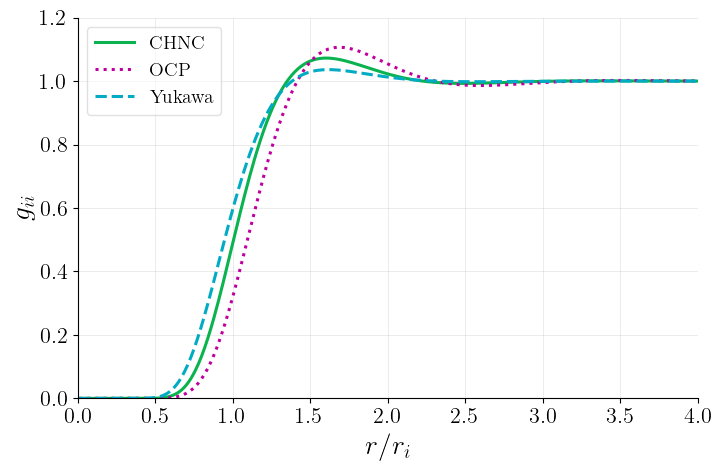

In [9]:
def g_ii_plot(ax):
    ax.plot(H1_CHNC['r/ri'],H1_CHNC['g_ii'], label="CHNC"  )
    ax.plot(H1_CHNC['r/ri'],H1_CHNC['OCP:g_ii'],':', label="OCP"  )
    ax.plot(H1_CHNC['r/ri'],H1_CHNC['Yuk:g_ii'],'--', label="Yukawa"  )


    ax.set_xlim(0,4)
    ax.set_ylim(0,1.2)
    # ax.set_yscale('symlog', linthresh=0.1)
    ax.set_ylabel(r"$g_{ii}$")
    ax.set_xlabel(r"$r/r_i$")
    ax.legend()

fig, ax  = plt.subplots( figsize=(8, 4.9443))
g_ii_plot(ax)

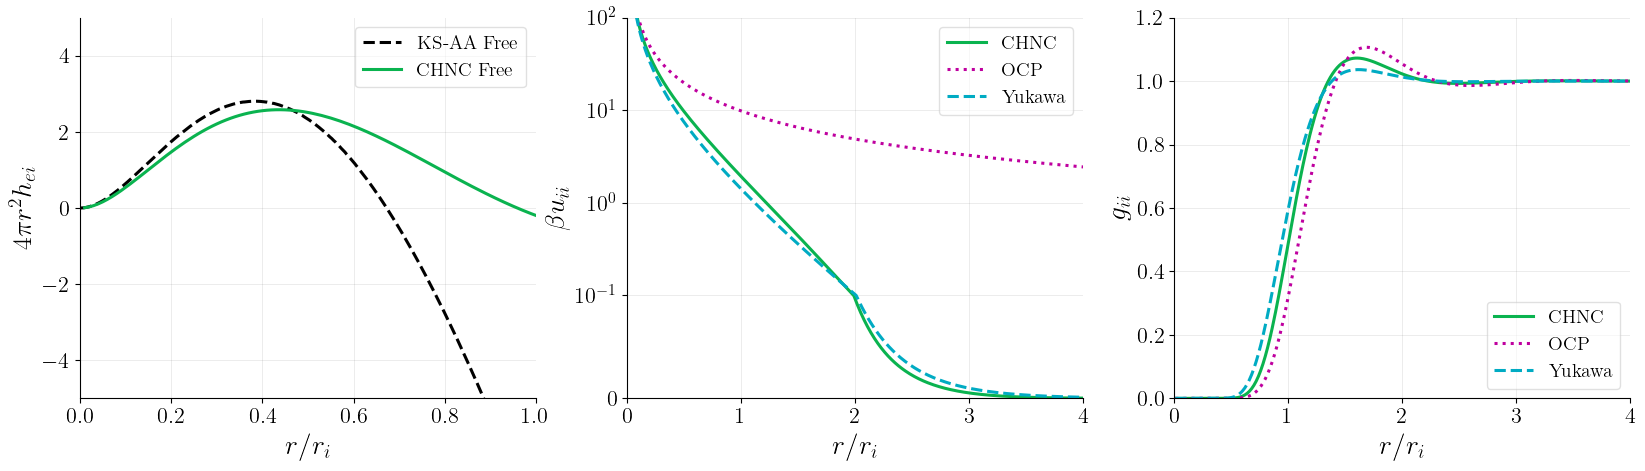

In [15]:
fig, axs = plt.subplots(1,3, figsize=(20, 4.9443))

g_ei_plot(axs[0])
βu_ii_plot(axs[1])
g_ii_plot(axs[2])